# User
Due fili di rame della lunghezza di 20 cm sono attraversati da correnti concordi variabili tra 5A e 30 A. La distanza iniziale tra i fili è 1 cm. Un filo è fisso l'altro è legato ad un dinamometro in modo da poter misura la forza agente. fai un programma che calcola la forza tra i fili al variare della corrente

# Assistant
# Anaconda Assistant

## Calculating the Force Between Two Current-Carrying Copper Wires

I'll create a program to calculate the force between two parallel copper wires as the current varies. This is a perfect application of Ampère's law for the magnetic force between current-carrying conductors.

For two parallel wires carrying currents in the same direction, the force is attractive and can be calculated using:

F = (μ₀ × I₁ × I₂ × L) / (2π × d)

Where:
- μ₀ is the magnetic permeability of vacuum (4π × 10⁻⁷ H/m)
- I₁ and I₂ are the currents in the wires (in amperes)
- L is the length of the wires (in meters)
- d is the distance between the wires (in meters)
- F is the resulting force (in newtons)

Here's a Python program that calculates and visualizes this force:


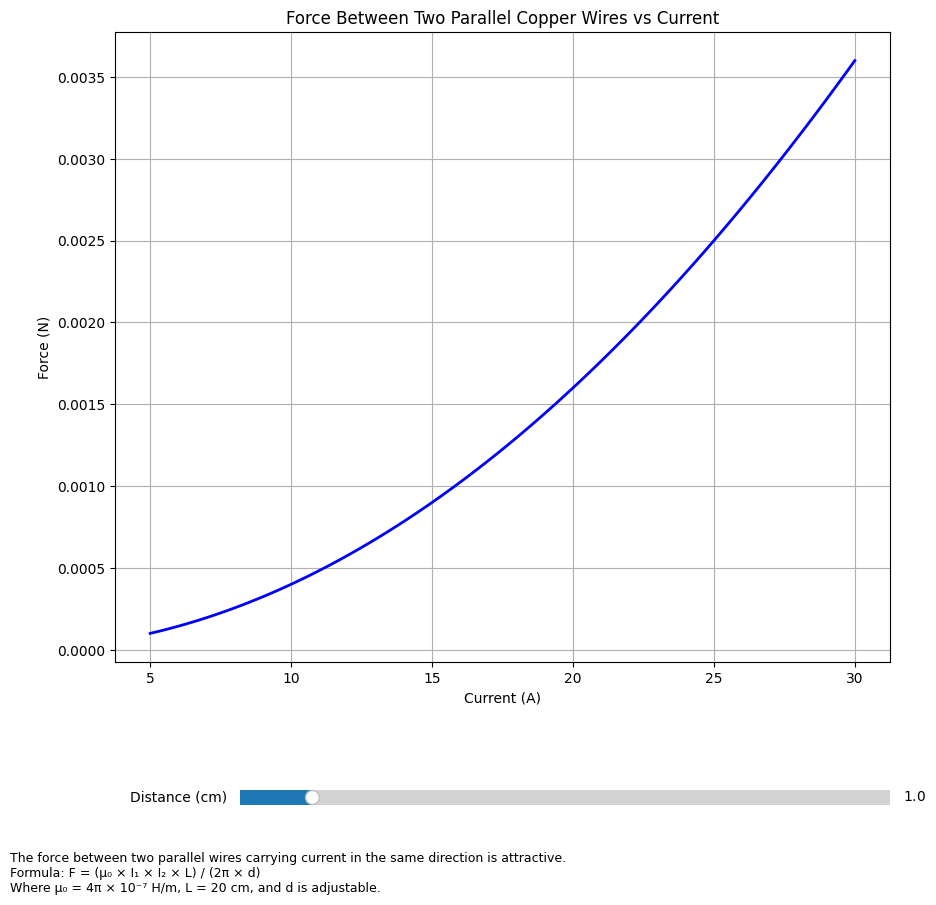

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Constants
mu0 = 4 * np.pi * 1e-7  # Magnetic permeability of vacuum (H/m)
length = 0.20  # Length of wires in meters (20 cm)
distance = 0.01  # Distance between wires in meters (1 cm)

# Function to calculate force between parallel wires
def calculate_force(current1, current2, length, distance):
    """
    Calculate the magnetic force between two parallel current-carrying wires

    Parameters:
    current1, current2: Currents in the wires (A)
    length: Length of the wires (m)
    distance: Distance between the wires (m)

    Returns:
    force: Magnetic force between the wires (N)
    """
    force = (mu0 * current1 * current2 * length) / (2 * np.pi * distance)
    return force

# Create current range for plotting
current_range = np.linspace(5, 30, 100)  # Current from 5A to 30A
forces = []

# Calculate forces for the case where both wires have the same current
for current in current_range:
    force = calculate_force(current, current, length, distance)
    forces.append(force)

# Create the figure and axis for plotting
fig, ax = plt.subplots(figsize=(10, 10))
plt.subplots_adjust(bottom=0.25)

# Plot the initial curve
line, = ax.plot(current_range, forces, 'b-', lw=2)
ax.set_xlabel('Current (A)')
ax.set_ylabel('Force (N)')
ax.set_title('Force Between Two Parallel Copper Wires vs Current')
ax.grid(True)

# Add a slider for adjusting the distance
ax_distance = plt.axes([0.25, 0.1, 0.65, 0.03])
distance_slider = Slider(
    ax=ax_distance,
    label='Distance (cm)',
    valmin=0.5,
    valmax=5.0,
    valinit=1.0,
)

# Function to update the plot when slider value changes
def update(val):
    new_distance = distance_slider.val / 100  # Convert cm to m
    new_forces = []
    for current in current_range:
        force = calculate_force(current, current, length, new_distance)
        new_forces.append(force)
    line.set_ydata(new_forces)
    ax.set_ylim(0, max(new_forces) * 1.1)
    fig.canvas.draw_idle()

# Register the update function with the slider
distance_slider.on_changed(update)

# Add text explaining the physics
plt.figtext(0.02, 0.02,
            "The force between two parallel wires carrying current in the same direction is attractive.\n"
            "Formula: F = (μ₀ × I₁ × I₂ × L) / (2π × d)\n"
            "Where μ₀ = 4π × 10⁻⁷ H/m, L = 20 cm, and d is adjustable.",
            fontsize=9)

# Keep a reference to the slider to prevent garbage collection
plt.show()

# Keep a reference to the slider widget to prevent it from being garbage collected.
# This is necessary in environments like Google Colab where interactive widgets
# might otherwise be removed from memory.
_ = distance_slider


This program:
1. Defines the physical constants and parameters of the problem
2. Creates a function to calculate the force using Ampère's law
3. Plots the force as a function of current (assuming both wires carry the same current)
4. Includes an interactive slider to adjust the distance between the wires
5. Updates the plot in real-time as the distance changes

The graph shows how the force increases quadratically with current (since both wires have the same current I, the force is proportional to I²). The attractive force between the wires increases as the current increases and decreases as the distance between them increases.